# Convolutional Neural Networks (CNN)

Mammography Image Dataset

In [1]:
import os

data_path = "C:/Users/Hp/MACHINE LEARNING/Lab/ML PROJECT/NEWDATA/Dataset of Mammography with Benign Malignant Breast Masses/INbreast+MIAS+DDSM Dataset"
benign_path = os.path.join(data_path, "Benign Masses")
malignant_path = os.path.join(data_path, "Malignant Masses")

In [2]:
import cv2
from tqdm import tqdm

def load_images(folder_path, label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))  # Resize the image as needed
        images.append(img)
        labels.append(label)
    return images, labels

In [3]:
benign_images, benign_labels = load_images(benign_path, "Benign Masses")
malignant_images, malignant_labels = load_images(malignant_path, "Malignant Masses")

100%|██████████| 13710/13710 [00:12<00:00, 1070.41it/s]


In [4]:
all_images = benign_images + malignant_images
all_labels = benign_labels + malignant_labels

In [5]:
import numpy as np

X = np.array(all_images)
y = np.array(all_labels)

In [6]:
np.unique(y)

array(['Benign Masses', 'Malignant Masses'], dtype='<U16')

In [7]:
import pandas as pd

pd.Series(y).value_counts()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7536\1149944248.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Malignant Masses    13710
Benign Masses       10866
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [9]:
# Remove the channel dimension from x_train and x_test
x_train = x_train[:, :, :, 0]  # Select only the first channel (or any other channel)
x_test = x_test[:, :, :, 0]    # Select only the first channel (or any other channel)

In [10]:
# Mengimpor library dan fungsi yang diperlukan untuk membangun model CNN.
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

# Menampilkan bentuk data latih dan data uji untuk memeriksa apakah dimensinya sesuai.
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (19660, 64, 64)
Shape of y_train: (19660,)

Shape of x_test: (4916, 64, 64)
Shape of y_test: (4916,)


2. Display the Digits

In [11]:
from IPython.display import display
import pandas as pd

# Display as text
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 5)

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.DataFrame(single.reshape(64,64))

Shape for dataset: (19660, 64, 64)
Labels: ['Benign Masses' 'Benign Masses' 'Benign Masses' ... 'Benign Masses'
 'Malignant Masses' 'Malignant Masses']
Shape for single: (64, 64)


,0,1,2,3,4,5,6,...,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


3. Let's display as image

Image (#140): Which is digit 'Malignant Masses'


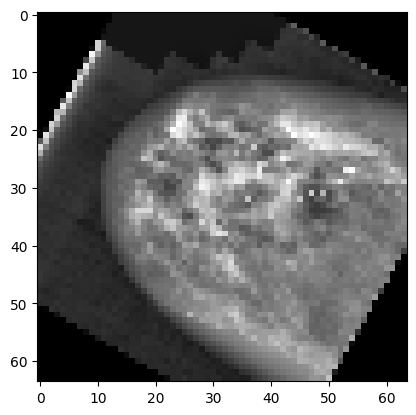

In [12]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 140 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

4. We can show the dataset with random. Using random library to show the figure

<Figure size 640x480 with 0 Axes>

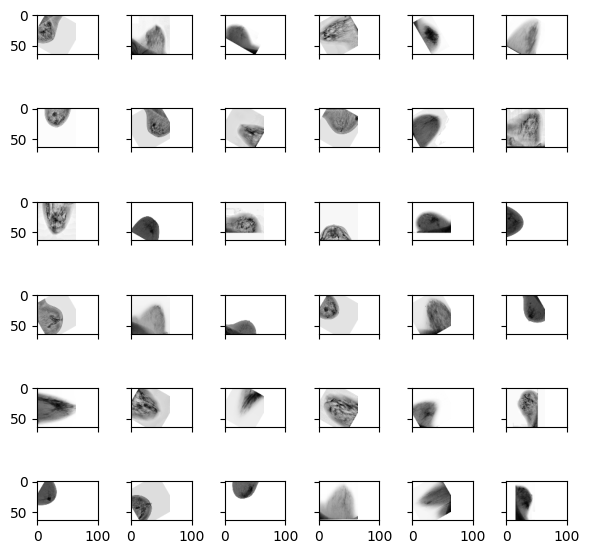

In [13]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS,
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True)

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (64,64))
    ax.imshow(plottable_image, cmap='gray_r')

    ax.set_xbound([0,100])

plt.tight_layout()
plt.show()

5. Split the data and input the parameter of CNN algorithm before make a model (train the data)

The parameters are :

    ● Batch size : 128
    
    ● Epoch : 12 epoch
    
    ● Number of classes = 10 class
    
    ● Picture size : 28x28
    
    ● Data type of training and testing : floating number
    
    ● Activated function : ReLu
    
    ● Model compiling optimizer : ADAM optimizer

In [14]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras. layers import Dense, Dropout, Flatten 
from tensorflow. keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions 
img_rows, img_cols = 64, 64
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train. shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalize the data
x_train /= 255
x_test /= 255
print ('x_train shape:', x_train.shape)
print ("Training samples: {}".format(x_train.shape[0]))
print ("Test samples: {}". format(x_test.shape[0]))

x_train shape: (19660, 64, 64, 1)
Training samples: 19660
Test samples: 4916


In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels into integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# MODELLING 

In [16]:
# Convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train_encoded, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test_encoded, num_classes)
model = Sequential()
model.add(Conv2D (32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(Conv2D (64, (3, 3), activation='relu'))
model.add(MaxPooling2D (pool_size= (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

6. Training the CNN – DIGITS datasets. This can take awhile

In [17]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}", elapsed_time)

Epoch 1/12
154/154 - 92s - loss: 0.5344 - accuracy: 0.7394 - val_loss: 0.3575 - val_accuracy: 0.8275 - 92s/epoch - 598ms/step
Epoch 2/12
154/154 - 83s - loss: 0.3624 - accuracy: 0.8256 - val_loss: 0.3139 - val_accuracy: 0.8432 - 83s/epoch - 541ms/step
Epoch 3/12
154/154 - 88s - loss: 0.3218 - accuracy: 0.8395 - val_loss: 0.2932 - val_accuracy: 0.8537 - 88s/epoch - 568ms/step
Epoch 4/12
154/154 - 71s - loss: 0.2944 - accuracy: 0.8523 - val_loss: 0.2904 - val_accuracy: 0.8578 - 71s/epoch - 463ms/step
Epoch 5/12
154/154 - 71s - loss: 0.2758 - accuracy: 0.8622 - val_loss: 0.2683 - val_accuracy: 0.8653 - 71s/epoch - 462ms/step
Epoch 6/12
154/154 - 85s - loss: 0.2555 - accuracy: 0.8748 - val_loss: 0.2462 - val_accuracy: 0.8773 - 85s/epoch - 549ms/step
Epoch 7/12
154/154 - 81s - loss: 0.2360 - accuracy: 0.8879 - val_loss: 0.2441 - val_accuracy: 0.8782 - 81s/epoch - 527ms/step
Epoch 8/12
154/154 - 86s - loss: 0.2142 - accuracy: 0.8995 - val_loss: 0.2063 - val_accuracy: 0.9054 - 86s/epoch - 555

7. Evaluate accuracy from DIGITS dataset

In [18]:
# Set the desired TensorFlow output level
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.15488389134407043
Test accuracy: 0.9399918913841248


In [19]:
from sklearn import metrics

small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

4/4 [==============================] - 1s 37ms/step
Accuracy: 0.9595959595959596


# STRATIFIED K-FOLD CROSS VALIDATION

In [41]:
from sklearn.model_selection import train_test_split, StratifiedKFold

k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=None)
cvscores = []

In [47]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np

k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=None)
cvscores = []

for train_index, val_index in skf.split(x_train, y_train):
    x_fold_train, x_fold_val = x_train[train_index], x_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    # Preprocess the data according to the model's input shape
    if K.image_data_format() == 'channels_first':
        x_fold_train = x_fold_train.reshape(x_fold_train.shape[0], 1, img_rows, img_cols)
        x_fold_val = x_fold_val.reshape(x_fold_val.shape[0], 1, img_rows, img_cols)
    else:
        x_fold_train = x_fold_train.reshape(x_fold_train.shape[0], img_rows, img_cols, 1)
        x_fold_val = x_fold_val.reshape(x_fold_val.shape[0], img_rows, img_cols, 1)
    
    x_fold_train = x_fold_train.astype('float32') / 255
    x_fold_val = x_fold_val.astype('float32') / 255
    
    # Convert class vectors to binary class matrices
    y_fold_train_encoded = label_encoder.transform(y_fold_train)
    y_fold_val_encoded = label_encoder.transform(y_fold_val)
    
    y_fold_train = tensorflow.keras.utils.to_categorical(y_fold_train_encoded, num_classes)
    y_fold_val = tensorflow.keras.utils.to_categorical(y_fold_val_encoded, num_classes)
    
    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    
    model.fit(x_fold_train, y_fold_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_fold_val, y_fold_val),
              callbacks=[early_stopping])
    
    # Evaluate the model
    scores = model.evaluate(x_fold_val, y_fold_val, verbose=0)
    print(f"Fold accuracy: {scores[1]*100}%")
    cvscores.append(scores[1] * 100)

print(f"Mean accuracy: {np.mean(cvscores)}%")
print(f"Standard deviation: {np.std(cvscores)}%")

Epoch 1/15
492/492 [==============================] - 79s 160ms/step - loss: 0.6900 - accuracy: 0.5477 - val_loss: 0.6872 - val_accuracy: 0.5577
Epoch 2/15
492/492 [==============================] - 96s 195ms/step - loss: 0.6893 - accuracy: 0.5498 - val_loss: 0.6893 - val_accuracy: 0.5577
Epoch 3/15
492/492 [==============================] - 82s 167ms/step - loss: 0.6884 - accuracy: 0.5497 - val_loss: 0.6866 - val_accuracy: 0.5577
Epoch 4/15
492/492 [==============================] - 90s 183ms/step - loss: 0.6901 - accuracy: 0.5485 - val_loss: 0.6887 - val_accuracy: 0.5577
Epoch 5/15
492/492 [==============================] - 84s 171ms/step - loss: 0.6894 - accuracy: 0.5505 - val_loss: 0.6890 - val_accuracy: 0.5577
Epoch 6/15
492/492 [==============================] - 77s 156ms/step - loss: 0.6895 - accuracy: 0.5507 - val_loss: 0.6923 - val_accuracy: 0.5577
Fold accuracy: 55.77314496040344%
Epoch 1/15
492/492 [==============================] - 94s 192ms/step - loss: 0.6892 - accuracy: 

# Parameter Combination

In [20]:
import numpy as np

X = np.array(all_images)
y = np.array(all_labels)

In [21]:
import pandas as pd

pd.Series(y).value_counts()

Malignant Masses    13710
Benign Masses       10866
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [23]:
# Remove the channel dimension from x_train and x_test
x_train = x_train[:, :, :, 0]  # Select only the first channel (or any other channel)
x_test = x_test[:, :, :, 0]    # Select only the first channel (or any other channel)

In [24]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K
batch_size = 32  # Ubah batch size menjadi 64
num_classes = 10
epochs = 15  # Ubah jumlah epoch menjadi 15
# input image dimensions 
img_rows, img_cols = 64, 64
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train. shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalize the data
x_train /= 255
x_test /= 255
print ('x_train shape:', x_train.shape)
print ("Training samples: {}".format(x_train.shape[0]))
print ("Test samples: {}". format(x_test.shape[0]))

x_train shape: (19660, 64, 64, 1)
Training samples: 19660
Test samples: 4916


In [25]:
from sklearn.preprocessing import LabelEncoder
# Encode class labels into integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [26]:
# Convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train_encoded, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test_encoded, num_classes)
model = Sequential()
model.add(Conv2D (32, kernel_size=(3, 3),
                  activation='sigmoid',  # Mengganti aktivasi menjadi Sigmoid
                  input_shape=input_shape))
model.add(Conv2D (64, (3, 3), activation='sigmoid'))  # Mengganti aktivasi menjadi Sigmoid
model.add(MaxPooling2D (pool_size= (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))  # Mengganti aktivasi menjadi Sigmoid
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [27]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}", elapsed_time)

Epoch 1/15
615/615 - 115s - loss: 0.7527 - accuracy: 0.5208 - val_loss: 0.6921 - val_accuracy: 0.5511 - 115s/epoch - 188ms/step
Epoch 2/15
615/615 - 97s - loss: 0.6905 - accuracy: 0.5516 - val_loss: 0.6904 - val_accuracy: 0.5511 - 97s/epoch - 158ms/step
Epoch 3/15
615/615 - 109s - loss: 0.6890 - accuracy: 0.5534 - val_loss: 0.6910 - val_accuracy: 0.5511 - 109s/epoch - 178ms/step
Epoch 4/15
615/615 - 110s - loss: 0.6905 - accuracy: 0.5480 - val_loss: 0.6881 - val_accuracy: 0.5511 - 110s/epoch - 179ms/step
Epoch 5/15
615/615 - 110s - loss: 0.6884 - accuracy: 0.5534 - val_loss: 0.6953 - val_accuracy: 0.5511 - 110s/epoch - 178ms/step
Epoch 6/15
615/615 - 98s - loss: 0.6895 - accuracy: 0.5519 - val_loss: 0.6880 - val_accuracy: 0.5511 - 98s/epoch - 159ms/step
Epoch 7/15
615/615 - 111s - loss: 0.6884 - accuracy: 0.5541 - val_loss: 0.6914 - val_accuracy: 0.5511 - 111s/epoch - 180ms/step
Epoch 8/15
615/615 - 108s - loss: 0.6895 - accuracy: 0.5512 - val_loss: 0.6881 - val_accuracy: 0.5511 - 108s

In [28]:
# Set the desired TensorFlow output level
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.6915410757064819
Test accuracy: 0.551057755947113


In [29]:
from sklearn import metrics

small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

4/4 [==============================] - 0s 33ms/step
Accuracy: 0.5454545454545454
